# Filtering and trimming messages

## Review

Now, we have a deeper understanding of a few things: 

* How to customize the graph state schema
* How to define custom state reducers
* How to use multiple graph state schemas

## Goals

Now, we can start using these concepts with models in LangGraph!
 
In the next few sessions, we'll build towards a chatbot that has long-term memory.

Because our chatbot will use messages, let's first talk a bit more about advanced ways to work with messages in graph state.

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_openai

In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

We'll use [LangSmith](https://docs.smith.langchain.com/) for [tracing](https://docs.smith.langchain.com/concepts/tracing).

We'll log to a project, `langchain-academy`. 

In [2]:
_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

## Messages as state

First, let's define some messages.

In [53]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(content = f"So you said you were researching ocean mammals?", name="Bot", id = 1)]
messages.append(HumanMessage(content = f"Yes, I know about whales. But what others should I learn about?", name="Lance", id = 2))

for m in messages:
    m.pretty_print()
    # pprint(m)

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?


Recall we can pass them to a chat model.

In [54]:
from langchain_openai import ChatOpenAI 

llm = ChatOpenAI(model="gpt-4o-mini")

llm.invoke(messages).pretty_print() 

print(type(llm.invoke(messages)))

================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are social animals that often live in pods. The bottlenose dolphin is one of the most well-known species.

2. **Porpoises**: Similar to dolphins, porpoises are smaller and have a rounder body. They are generally less acrobatic than dolphins but are equally social.

3. **Seals**: This group includes true seals (like the harbor seal) and eared seals (like sea lions). They are known for their whiskers and can often be seen lounging on rocks or beaches.

4. **Sea Lions**: These are a type of eared seal known for their external ear flaps and more social behavior. They are often found in large colonies.

5. **Manatees**: Also known as sea cows, manatees are gentle herbivores that inhabit coastal waters and rivers. They are known for

In [32]:
from langchain_groq import ChatGroq 

llm_70b = ChatGroq(model = "llama-3.1-70b-versatile", temperature = 0) 

llm_70b.invoke(messages).pretty_print() 

print(type(llm_70b.invoke(messages)))

================================== Ai Message ==================================

Besides whales, there are many other fascinating ocean mammals. Here are a few you might want to learn about:

1. **Dolphins**: These intelligent and social creatures are closely related to whales. They're known for their playful behavior and ability to communicate with each other using clicks and whistles.
2. **Seals and Sea Lions**: These fin-footed mammals are found in oceans around the world. They're skilled swimmers and divers, and are known for their ability to haul themselves out of the water onto rocks and beaches.
3. **Walruses**: These large, tusked mammals are found in the Arctic and sub-Arctic oceans. They're skilled divers and feed on clams and other marine animals.
4. **Manatees**: These gentle creatures are found in shallow waters in the Caribbean and Gulf of Mexico. They're also known as sea cows, and feed on seaweed and other aquatic plants.
5. **Dugongs**: These large, herbivorous mammal

In [33]:
from langchain_groq import ChatGroq 

llm_8b = ChatGroq(model = "llama-3.1-8b-instant", temperature = 0) 

llm_8b.invoke(messages).pretty_print()

print(type(llm_8b.invoke(messages)))

================================== Ai Message ==================================

There are many fascinating ocean mammals beyond whales. Here are some you might find interesting:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are highly social marine mammals that communicate using clicks and whistles.
2. **Seals and Sea Lions**: These pinnipeds (fin-footed mammals) are found in oceans worldwide and are known for their agility and playful nature.
3. **Walruses**: Large, carnivorous mammals with distinctive tusks, walruses are found in the Arctic and sub-Arctic regions.
4. **Manatees**: Also known as sea cows, manatees are large, slow-moving mammals that inhabit shallow waters in the Caribbean and Gulf of Mexico.
5. **Dugongs**: Similar to manatees, dugongs are large, herbivorous mammals found in the warm waters of the Indo-Pacific region.
6. **Belugas**: Small, white whales with distinctive rounded foreheads, belugas are found in the Arctic and sub-Arctic 

In [34]:
from langchain_groq import ChatGroq 

llm_8b_3 = ChatGroq(model = "llama3-8b-8192", temperature = 0) 

llm_8b_3.invoke(messages).pretty_print()

================================== Ai Message ==================================

There are many fascinating ocean mammals beyond whales. Here are some you might find interesting:

1. **Dolphins**: These intelligent, social creatures are known for their playful behavior and ability to communicate with each other using clicks and whistles.
2. **Seals and Sea Lions**: These fin-footed mammals are closely related to walruses and are found in oceans worldwide. They're known for their agility and ability to haul out on land.
3. **Walruses**: With their distinctive tusks and blubbery bodies, walruses are a common sight in Arctic and sub-Arctic waters. They're skilled swimmers and can dive to great depths.
4. **Manatees**: Also known as sea cows, manatees are large, slow-moving mammals that inhabit shallow waters in the Caribbean and Gulf of Mexico.
5. **Monk Seals**: These small, eel-like mammals are found in tropical and subtropical waters and are known for their ability to sleep with only 

In [36]:
from langchain_groq import ChatGroq 

llm_8x7b = ChatGroq(model = "mixtral-8x7b-32768", temperature = 0) 

llm_8x7b.invoke(messages).pretty_print()

================================== Ai Message ==================================

Great! Whales are fascinating creatures. There are many other ocean mammals that are worth learning about. Here are a few:

1. Dolphins: Dolphins are highly intelligent and social animals that are known for their playful behavior and acrobatic displays. They are found in oceans all around the world and come in many different species, such as the bottlenose dolphin, common dolphin, and orca (also known as the killer whale).
2. Porpoises: Porpoises are similar to dolphins but are generally smaller and have a more rounded head. They are also found in oceans worldwide and are known for their shy and elusive behavior.
3. Seals: Seals are marine mammals that are adapted to life in the water and on land. They have a streamlined body and limbs that have evolved into flippers. Seals are found in both the Northern and Southern Hemispheres and come in many different species, such as the harbor seal, gray seal, and e

In [44]:
from langchain_ollama import ChatOllama 

llm_ollama = ChatOllama(model = "gemma2:2b", temperature = 0) 

llm_ollama.invoke(messages).pretty_print()

================================== Ai Message ==================================

That's great! Whales are fascinating, but the world of ocean mammals is vast and diverse.  Here are some other amazing creatures to explore:

**Dolphins:** 
* **Intelligence:** Known for their playful nature and complex communication skills.
* **Social Structure:** Live in pods with strong social bonds and intricate hierarchies.
* **Unique Adaptations:** Echolocation, a system of sound-based navigation that allows them to "see" in the dark.

**Seals & Sea Lions:** 
* **Aquatic Acrobatics:**  Known for their playful nature and impressive swimming abilities.
* **Diverse Habitats:** Found in coastal areas around the world, from icy Arctic waters to warm tropical seas.
* **Unique Adaptations:** Blubber for insulation, flippers for efficient movement through water.

**Manatees & Sea Otters:** 
* **Gentle Giants:** Manatees are herbivores known for their slow-moving nature and gentle demeanor.
* **Sea Otter's E

In [48]:
from langchain_ollama import ChatOllama 

llm_ollama_stream = ChatOllama(model = "gemma2:2b", temperature = 0) 

for chunk in llm_ollama_stream.stream(messages): 
    print(chunk.content, end = "")

That's great! Whales are fascinating, but the world of ocean mammals is vast and diverse.  Here are some other amazing creatures to explore:

**Dolphins:** 
* **Intelligence:** Known for their playful nature and complex communication skills.
* **Social Structure:** Live in pods with strong social bonds and intricate hierarchies.
* **Unique Adaptations:** Echolocation, a system of sound-based navigation that allows them to "see" in the dark.

**Seals & Sea Lions:** 
* **Aquatic Acrobatics:**  Known for their playful nature and impressive swimming abilities.
* **Diverse Habitats:** Found in coastal areas around the world, from icy Arctic waters to warm tropical seas.
* **Unique Adaptations:** Blubber for insulation, flippers for efficient movement through water.

**Manatees & Sea Otters:** 
* **Gentle Giants:** Manatees are herbivores known for their slow-moving nature and gentle demeanor.
* **Sea Otter's Efficiency:**  Sea otters are highly skilled hunters, using tools like rocks to cat

In [ ]:
from langgraph.graph.message import add_messages

new_message = HumanMessage(content = f"What other animals can I learn about. Limit your response to only five animals, then end your response.", name = "Bot", id =2)

add_messages(messages, new_message)

from langchain_ollama import ChatOllama 

llm_ollama_phi_3 = ChatOllama(model = "phi3:mini", temperature = 0) 

# llm_ollama_phi_3.invoke(input = messages).pretty_print()

for chunk in llm_ollama_phi_3.stream(messages): 
    print(chunk.content, end = "") # Outputs continuously, without reaching an /end token

We can run our chat model in a simple graph with `MessagesState`.

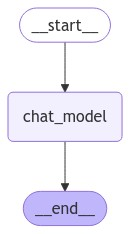

In [37]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [62]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are part of the cetacean family, which includes whales, and they are often seen in pods.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different body shape, porpoises are also social animals and are known for their shy nature.

3. **Seals**: There are several species of seals, including harbor seals and elephant seals. They are known for their playful nature and can often be seen lounging on rocks or beaches.

## Reducer

A practical challenge when working with messages is managing long-running conversations. 

Long-running conversations result in high token usage and latency if we are not careful, because we pass a growing list of messages to the model.

We have a few ways to address this.

First, recall the trick we saw using `RemoveMessage` and the `add_messages` reducer.

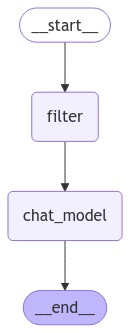

In [63]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [64]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are social animals that live in pods and have complex communication systems.

2. **Porpoises** - Similar to dolphins but generally smaller and with a different snout shape, porpoises are also highly social and often found in coastal waters.

3. **Seals** - There are many species of seals, including harbor seals and elephant seals. They are known for their playful nature and can often be seen basking on rocks or beaches.

4. **Sea Lio

## Filtering messages

If you don't need or want to modify the graph state, you can just filter the messages you pass to the chat model.

For example, just pass in a filtered list: `llm.invoke(messages[-1:])` to the model.

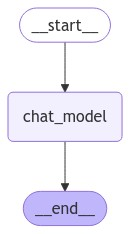

In [65]:
# Node
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

Let's take our existing list of messages, append the above LLM response, and append a follow-up question.

In [70]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Lance"))

In [71]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are social animals that live in pods and have complex communication systems.

2. **Porpoises** - Similar to dolphins but generally smaller and with a different snout shape, porpoises are also highly social and often found in coastal waters.

3

In [72]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are social animals that live in pods and have complex communication systems.

2. **Porpoises** - Similar to dolphins but generally smaller and with a different snout shape, porpoises are also highly social and often found in coastal waters.

3

The state has all of the mesages.

But, let's look at the LangSmith trace to see that the model invocation only uses the last message:

https://smith.langchain.com/public/75aca3ce-ef19-4b92-94be-0178c7a660d9/r

## Trim messages

Another approach is to [trim messages](https://python.langchain.com/v0.2/docs/how_to/trim_messages/#getting-the-last-max_tokens-tokens), based upon a set number of tokens. 

This restricts the message history to a specified number of tokens.

While filtering only returns a post-hoc subset of the messages between agents, trimming restricts the number of tokens that a chat model can use to respond.

See the `trim_messages` below.

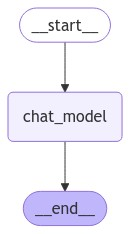

In [85]:
from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o-mini"),
            allow_partial=True, # or False
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [86]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

In [87]:
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=True
        )

[AIMessage(content='- Their tusks contain sensory nerves, which may help them detect changes in their environment.\n- Narwhals can live for over 50 years, with some individuals reaching ages of 90 years or more.\n\nOverall, narwhals are fascinating creatures that play an important role in their Arctic ecosystem, and ongoing research is crucial to ensure their survival in a changing world.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 488, 'prompt_tokens': 17, 'total_tokens': 505, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1bb46167f9', 'finish_reason': 'stop', 'logprobs': None}, id='run-97763cfd-302f-4ada-a1c8-09ea5aa40279-0', usage_metadata={'input_tokens': 17, 'output_tokens': 488, 'total_tokens': 505}),
 HumanMessage(content='Tell me where Orcas live!', additional_kwargs={}, response_metadata={}, name='Lance')]

In [92]:
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o-mini"),
            allow_partial=False
            )

[HumanMessage(content='Tell me where Orcas live!', additional_kwargs={}, response_metadata={}, name='Lance', id='d82c767e-d287-42e3-a31a-a50e1a59abe0')]

In [88]:
# Invoke, using message trimming
messages_out_trim = graph.invoke({'messages': messages})

In [89]:
for i in messages_out_trim["messages"]: 
    i.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several other fascinating ocean mammals you might want to learn about:

1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are social animals that live in pods and have complex communication systems.

2. **Porpoises** - Similar to dolphins but generally smaller and with a different snout shape, porpoises are also highly social and often found in coastal waters.

3

Let's look at the LangSmith trace to see the model invocation:

https://smith.langchain.com/public/b153f7e9-f1a5-4d60-8074-f0d7ab5b42ef/r